In [1]:
# Module importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from scipy.stats import norm

In [2]:
# Daten einlesen
data = pd.read_csv("austin_metro-1647616538.csv")
data.head()

,Year,Population
0,1840,553
1,1850,629
2,1860,3494
3,1870,4428
4,1880,11013


In [3]:
# x und y definieren
y = data["Population"].values
x = data["Year"].values.reshape(-1,1)

# Variabel Transformation der y-Achse 
y = np.log(y)


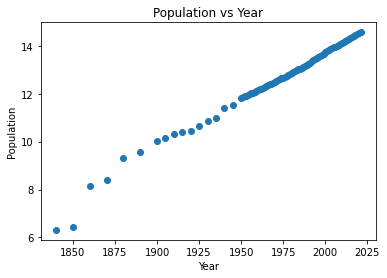

In [4]:
# Scatterplot erstellen, Grafische Darstellung 
plt.scatter(x,y)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population vs Year")
plt.show()

In [5]:
# Lineares Model erstellen
model = LinearRegression().fit(x,y)
r2 = model.score(x,y)

# Parameter der Linearen Gleichung 
steigung = model.coef_[0]
achse = model.intercept_

# Gleichung der Linearen Regression
print("log(Population)  = ", steigung, " * year + ", achse)
print("R2 ", r2)

log(Population)  =  0.04125390643553849  * year +  -68.7682209530537
R2  0.9877607309841009


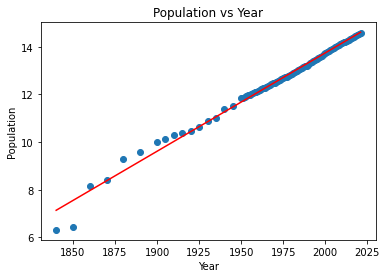

In [6]:
# Regressionsgerade mit Daten und Achsenbeschriftung
plt.scatter(x,y)
plt.plot(x, model.predict(x), color = "r")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population vs Year")
plt.show()

In [7]:
# 86 degrees of freedom
# Das Bedeutet, das 86% der Residuen sich innererhlab vom [Erwartungswert +- sigma] sich befinden. 

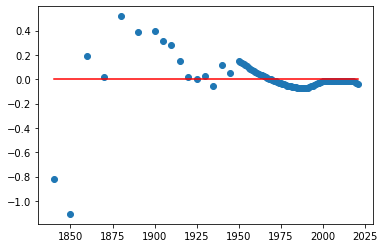

In [8]:
# Residuentest => Testkriterien sind: (Erwartungswert = 0, Residuen sind unabahengig voneinenader, 
# residuen sind Normalverteilung)

# Residuen berechnen
y_predict = model.predict(x)
resi = y - y_predict

# Residuen plotten
plt.scatter(x, resi)
plt.plot(x, 0* x, c = "r")
plt.show()

# Erwartungswert der Residuen liegen um 0 -> i.o
# Die Residuen sind unabhaengig voneinander

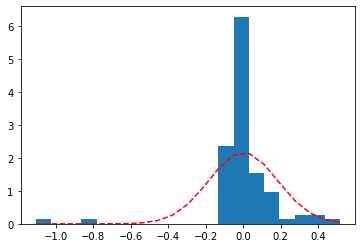

In [9]:
# Residuenanalyse
n, bins, patches = plt.hist(resi, 20, stacked = True, density = True)

mue = np.mean(resi)
sigma = np.std(resi)

y = norm.pdf(bins, mue, sigma)
plt.plot(bins, y, "r--")
plt.show()

# Die Residuen sind normalverteilt => i.o

In [10]:
# Prognose fuer Einwohnerzahl im Jahr 2015
result = model.predict([[2015]])
print(result[0])

14.358400514556351
